In [2]:
# Importing libraries
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [4]:
# Load training dataset
bike_data=pd.read_csv('daily-bike-share.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [5]:
# Add new column- day
bike_data['day']=pd.DatetimeIndex(bike_data['dteday']).day
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5


In [6]:
# Group numeric and categorical fetaures separately
numeric_features=['temp','atemp','hum','windspeed']
categorical_features=['season','yr','mnth','holiday','weekday','workingday','weathersit','day']

In [7]:
# Descriptive statistics
bike_data[numeric_features+['rentals']].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


In [9]:
# Separate features and labels
X,y=bike_data[['temp','atemp','hum','windspeed','season','yr','mnth','holiday','weekday','workingday','weathersit','day']].values,bike_data['rentals'].values

In [12]:
# Split dataset into training and validation sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
print('Training set:', X_train.shape[0],'rows')
print('Test set',X_test.shape[0],'rows')

Training set: 511 rows
Test set 220 rows


In [14]:
# train using Gradient Boosting Algorithm
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [15]:
# Fit model
model=GradientBoostingRegressor().fit(X_train,y_train)
print(model)

GradientBoostingRegressor()


In [16]:
# Use and evaluate model
predictions = model.predict(X_test)
mse=mean_squared_error(y_test,predictions)
print("MSE:",mse)
rmse=np.sqrt(mse)
print("RMSE:",rmse)
r2=r2_score(y_test,predictions)
print("r2:",mse)

MSE: 72157.91342675804
RMSE: 268.6222504312665
r2: 72157.91342675804


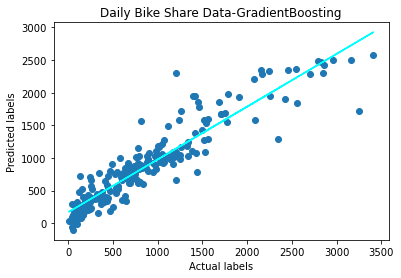

In [18]:
# Plot predicted vs actual
plt.scatter(y_test,predictions)
plt.xlabel('Actual labels')
plt.ylabel('Predicted labels')
plt.title('Daily Bike Share Data-GradientBoosting')
z=np.polyfit(y_test,predictions,1)
p=np.poly1d(z)
plt.plot(y_test,p(y_test),color='cyan')
plt.show()

In [19]:
# using a grid search to try combinations for the learning_rate and n_estimators hyperparameters of the GradientBoostingRegressor estimator
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,r2_score

In [20]:
# Use GradientBoostingAlgorithm
alg=GradientBoostingRegressor()

In [21]:
params={'learning_rate':[0.1,0.5,1.0],
       "n_estimators":[50,100,150]}

In [22]:
# Find best hyperparameter combination
score=make_scorer(r2_score)
gridsearch=GridSearchCV(alg,params,scoring=score,cv=3,return_train_score=True)
gridsearch.fit(X_train,y_train)
print("Best parameter combination:",gridsearch.best_params_,"\n")

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 100} 



In [23]:
# Get the best model
model=gridsearch.best_estimator_
print(model,"\n")

GradientBoostingRegressor() 



MSE: 72526.35657716809
RMSE: 269.30717884447137
R2: 0.8578166299487904


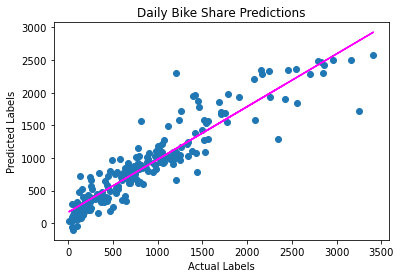

In [24]:
# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)
# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()


# Preprocessing
    (1) Scaling numeric features
    (2) Encoding categorical features

In [26]:
# Use Pipeline feature
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LinearRegression

In [27]:
# Defining preprocessing for numeric features (scaling)
numeric_features=[6,7,8,9]
numeric_transformer=Pipeline(steps=[('scaler',StandardScaler())])

In [28]:
# Defining preprocessing for categorical features (encoding)
categorical_features=[0,1,2,3,4,5]
categorical_transformer=Pipeline(steps=[('onehot',OneHotEncoder(handle_unknown='ignore'))])

In [29]:
# Combine preprocessing steps
preprocessor=ColumnTransformer(transformers=[
    ('num',numeric_transformer,numeric_features),('cat',categorical_transformer,categorical_features)
])

In [30]:
# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor',preprocessor),('regressor',GradientBoostingRegressor())])

In [31]:
# Fit the pipeline to train model
model=pipeline.fit(X_train,y_train)

In [32]:
print(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', GradientBoostingRegressor())])


MSE: 142357.6887776584
RMSE: 377.3031788597313
R2 Score: 0.7209166860385106


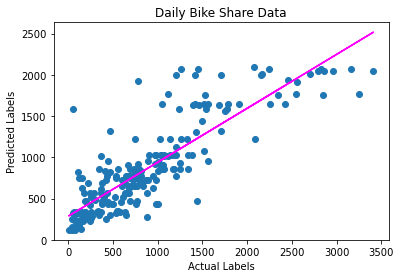

In [34]:
# Get predictions and evaluate model performance
predictions=model.predict(X_test)
mse=mean_squared_error(y_test,predictions)
print("MSE:",mse)
rmse=np.sqrt(mse)
print("RMSE:",rmse)
r2=r2_score(y_test,predictions)
print("R2 Score:",r2)
#Plot predicted vs actual
plt.scatter(y_test,predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Data')
# Plot regression line
z=np.polyfit(y_test,predictions,1)
p=np.poly1d(z)
plt.plot(y_test,p(y_test),color='magenta')
plt.show()

In [35]:
# Try different algorithm
pipeline=Pipeline(steps=[('preprocessor',preprocessor),('regressor',RandomForestRegressor())])

In [37]:
model=pipeline.fit(X_train,(y_train))
print(model,"\n")

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', RandomForestRegressor())]) 



In [38]:
predictions=model.predict(X_test)

In [39]:
mse=mean_squared_error(y_test,predictions)
print("MSE:",mse)
rmse=np.sqrt(mse)
print("RMSE:",rmse)
r2=r2_score(y_test,predictions)
print("R2 Score:",r2)

MSE: 134295.58177000002
RMSE: 366.463615888399
R2 Score: 0.7367219408198213


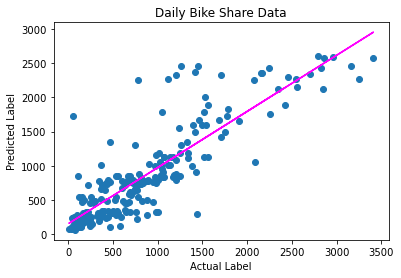

In [40]:
# Plot Actual vs Predicted
plt.scatter(y_test,predictions)
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
plt.title("Daily Bike Share Data")
z=np.polyfit(y_test,predictions,1)
p=np.poly1d(z)
plt.plot(y_test,p(y_test),color='magenta')
plt.show()

In [41]:
import joblib


In [42]:
filename='./bike_share.pkl'
joblib.dump(model,filename)

['./bike_share.pkl']

In [43]:
loaded_model=joblib.load(filename)

In [46]:
X_new = np.array([[1,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869,0.5,1]]).astype('float64')
print ('New sample: {}'.format(list(X_new[0])))


New sample: [1.0, 1.0, 0.0, 3.0, 1.0, 1.0, 0.226957, 0.22927, 0.436957, 0.1869, 0.5, 1.0]


In [47]:
result = loaded_model.predict(X_new)
print('Prediction: {:.0f} rentals'.format(np.round(result[0])))


Prediction: 320 rentals


In [48]:
result = loaded_model.predict(X_new)
print('Prediction: {:.0f} rentals'.format(np.round(result[0])))


Prediction: 320 rentals


In [54]:
X_new = np.array([[0,1,1,0,0,1,0.344167,0.363625,0.805833,0.160446,0.5,1],
                  [0,1,0,1,0,1,0.363478,0.353739,0.696087,0.248539,0.5,1],
                  [0,1,0,2,0,1,0.196364,0.189405,0.437273,0.248309,0.5,1],
                  [0,1,0,3,0,1,0.2,0.212122,0.590435,0.160296,0.5,1],
                  [0,1,0,4,0,1,0.226957,0.22927,0.436957,0.1869,0.5,1]])


In [55]:
# Use the model to predict rentals
results = loaded_model.predict(X_new)
print('5-day rental predictions:')
for prediction in results:
    print(np.round(prediction))


5-day rental predictions:
1407.0
1407.0
1459.0
1407.0
1459.0
